In [1]:
#Import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset into a Pandas DataFrame
df = pd.read_csv('Dataset_Uber Traffic.csv')

In [3]:
#Display the first few rows of the dataset
print(df.head())

           DateTime  Junction  Vehicles           ID
0  01/11/2015 00:00         1        15  20151101001
1  01/11/2015 01:00         1        13  20151101011
2  01/11/2015 02:00         1        10  20151101021
3  01/11/2015 03:00         1         7  20151101031
4  01/11/2015 04:00         1         9  20151101041


In [4]:
#Summary statistics
print(df.describe())

           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10


In [5]:
#Information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [6]:
#Check for missing values
print(df.isnull().sum())

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [7]:
#Since there are no missing values,we move forward with the Aggregating & Preprocessing of data.

In [9]:
#Now we compile traffic data into hourly intervals for each junction
#Step 1: Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [10]:
#Step 2: Extract the hour and date from the DateTime column
df['Hour'] = df['DateTime'].dt.hour
df['Date'] = df['DateTime'].dt.date

In [11]:
#Step 3: Calculate the average vehicle count per hour for each junction
average_vehicles_per_hour = df.groupby(['Junction', 'Hour'])['Vehicles'].mean().reset_index()

In [12]:
#Step 4: Find the peak traffic hour for each junction
peak_traffic_hours = average_vehicles_per_hour.loc[average_vehicles_per_hour.groupby('Junction')['Vehicles'].idxmax()]

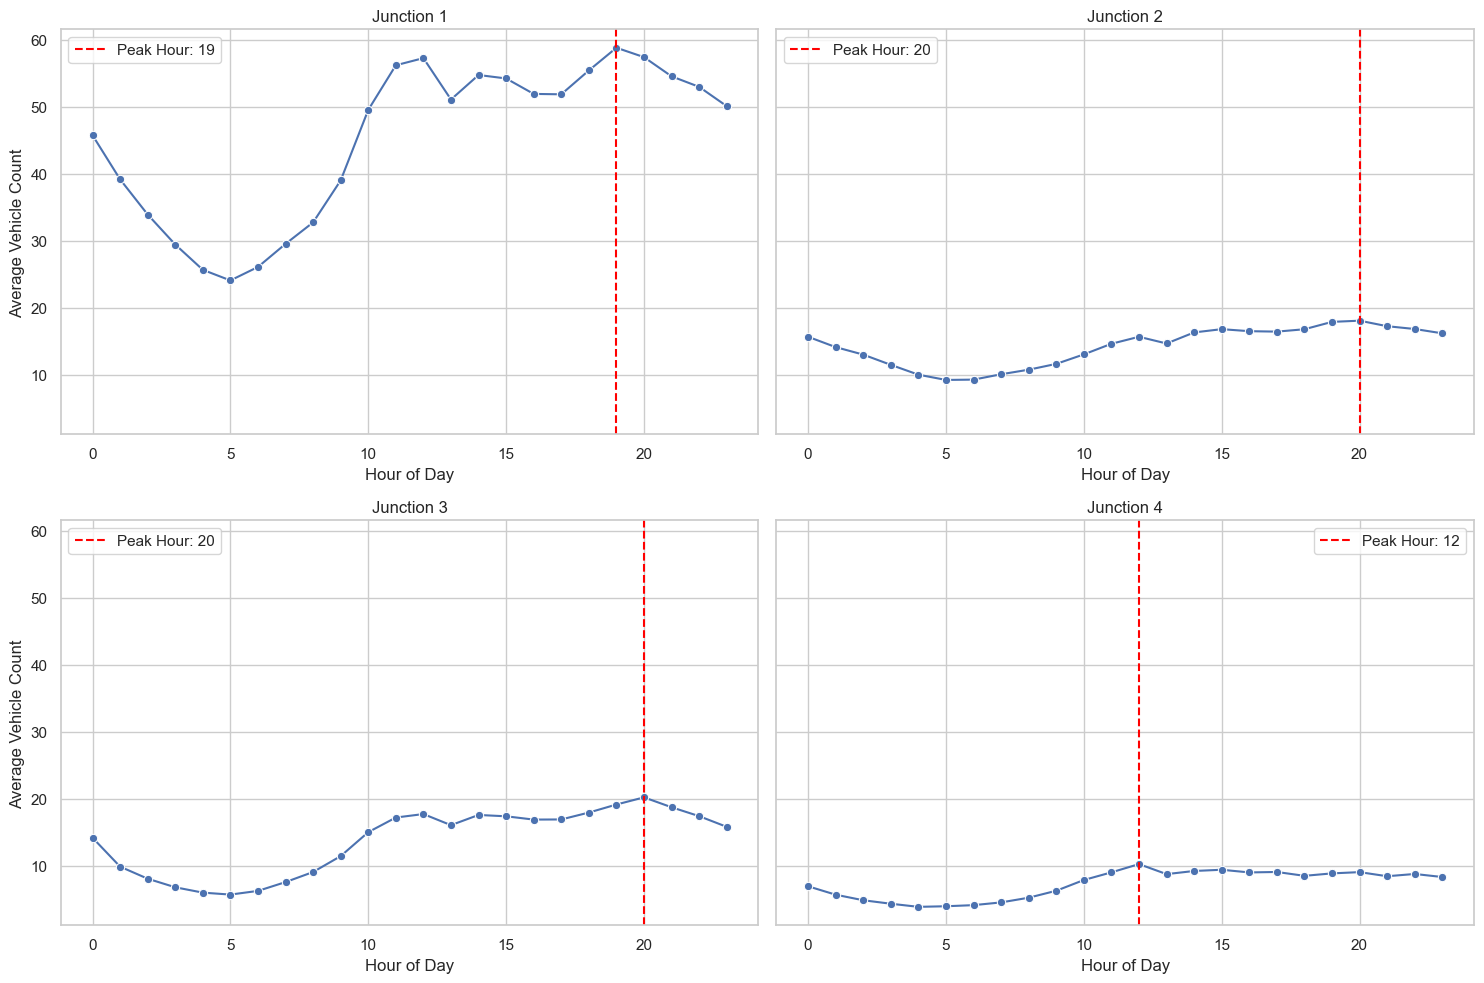

In [15]:
#Step 5: Set up the plotting environment
sns.set(style="whitegrid")

# Step 6: Plot the average vehicle count per hour for each junction
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
junctions = df['Junction'].unique()

for idx, junction in enumerate(junctions):
    ax = axes[idx // 2, idx % 2]
    
    # Filter data for the current junction
    junction_data = average_vehicles_per_hour[average_vehicles_per_hour['Junction'] == junction]
    
    # Plot average vehicle count per hour
    sns.lineplot(x='Hour', y='Vehicles', data=junction_data, ax=ax, marker='o')
    
    # Highlight peak hour with a red dashed line
    peak_hour = peak_traffic_hours.loc[peak_traffic_hours['Junction'] == junction, 'Hour'].values[0]
    ax.axvline(peak_hour, color='red', linestyle='--', label=f'Peak Hour: {peak_hour}')
    
    # Set plot labels and legend
    ax.set_title(f'Junction {junction}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Average Vehicle Count')
    ax.legend()

plt.tight_layout()
plt.show()

In [16]:
#From these plots we can infer that Junction 1 is the busiest at 7pm while Junction 2 is 8pm, 
#Junction 3 is 8pm and Junction 4 is 12pm.

In [17]:
#Ensuring data includes relevant details such as vehicle counts.
#Step 1: Extract the day of the week from the DateTime column
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

In [18]:
#Step 2: Calculate the total vehicle count per day of the week for each junction
total_vehicles_per_day = df.groupby(['Junction', 'DayOfWeek'])['Vehicles'].sum().reset_index()

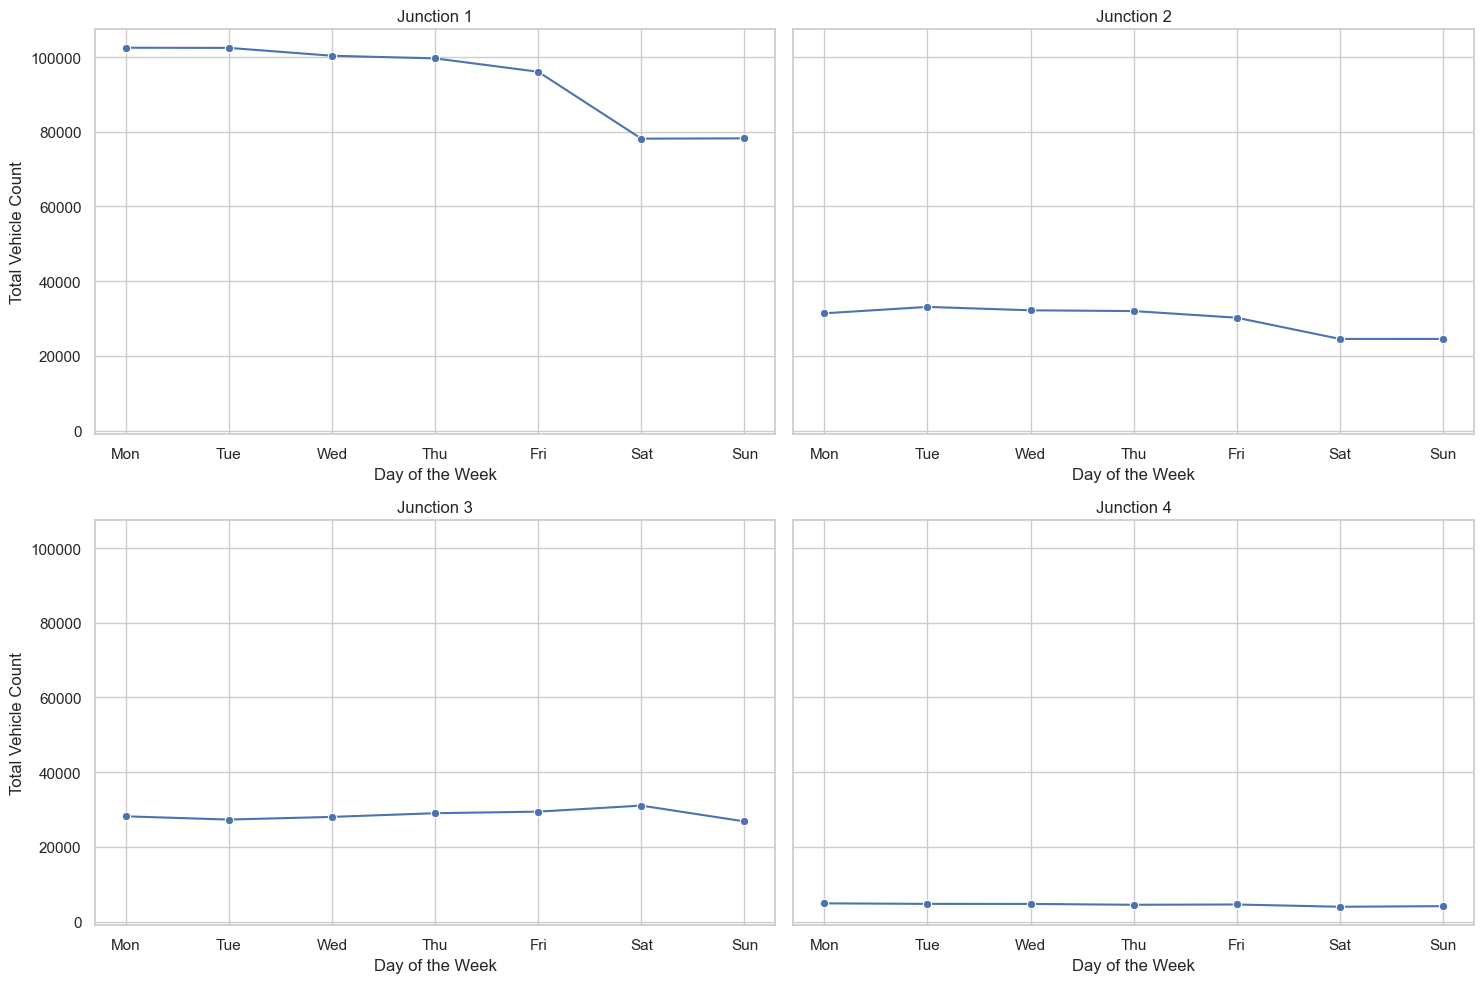

In [19]:
#Step 3: Plot the total vehicle count per day of the week for each junction
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
junctions = df['Junction'].unique()

for idx, junction in enumerate(junctions):
    ax = axes[idx // 2, idx % 2]
    
    # Filter data for the current junction
    junction_data = total_vehicles_per_day[total_vehicles_per_day['Junction'] == junction]
    
    # Plot total vehicle count per day of the week
    sns.lineplot(x='DayOfWeek', y='Vehicles', data=junction_data, ax=ax, marker='o')
    
    # Set plot labels and formatting
    ax.set_title(f'Junction {junction}')
    ax.set_xlabel('Day of the Week')
    ax.set_ylabel('Total Vehicle Count')
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

In [20]:
#Creating binary indicators for weekends (1 for weekends, 0 for weekdays)
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

Text(0.5, 1.0, 'Average Vehicle Counts for Weekdays vs Weekends')

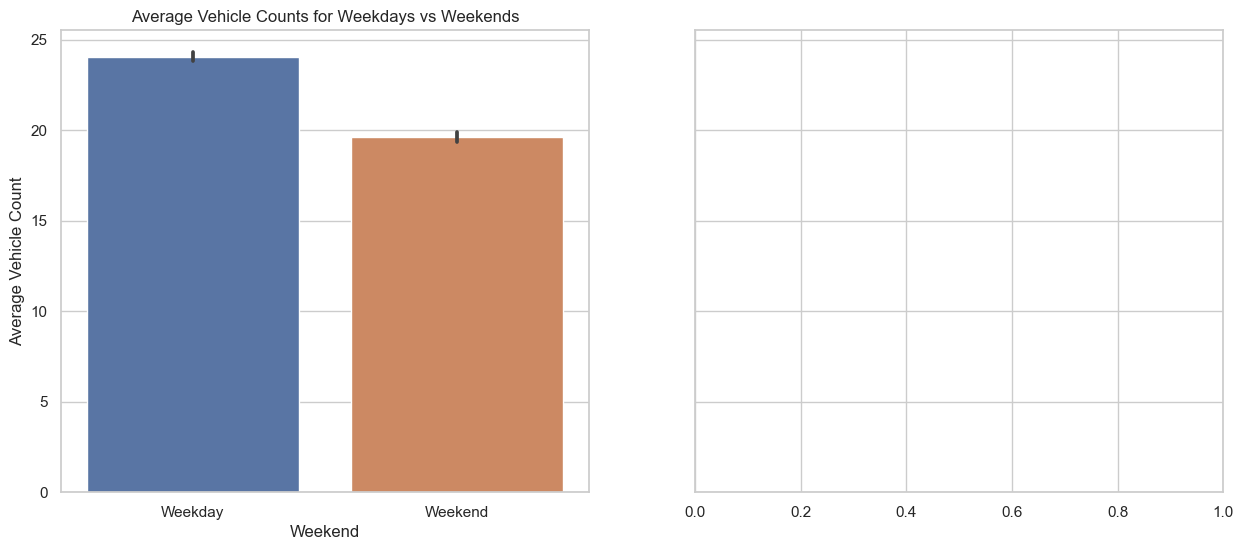

In [30]:
# Step 4: Plot average vehicle counts by weekends and events
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

#Plot 1: Average vehicle counts for weekends vs weekdays
sns.barplot(x='IsWeekend', y='Vehicles', data=df, estimator=np.mean, ax=axes[0])
axes[0].set_xticklabels(['Weekday', 'Weekend'])
axes[0].set_xlabel('Weekend')
axes[0].set_ylabel('Average Vehicle Count')
axes[0].set_title('Average Vehicle Counts for Weekdays vs Weekends')

C:\Users\HP\AppData\Local\Temp\ipykernel_17452\2083230570.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Vehicles', hue='Year', data=df, estimator='mean', ci=None)


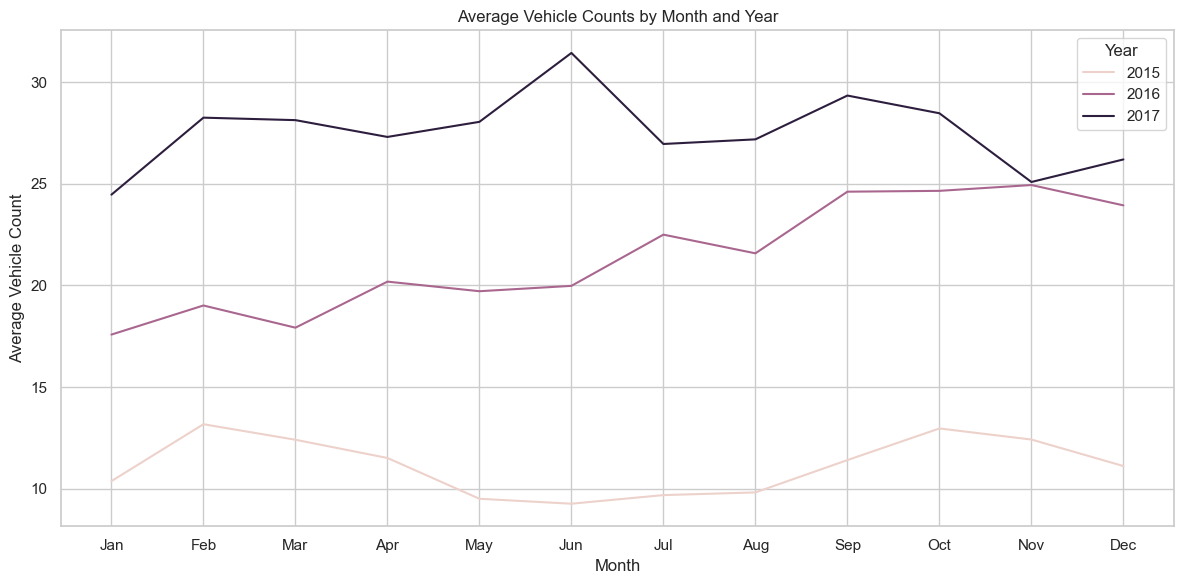

In [32]:
#Plot 2: Plot average vehicle counts by year and month
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Vehicles', hue='Year', data=df, estimator='mean', ci=None)
plt.xlabel('Month')
plt.ylabel('Average Vehicle Count')
plt.title('Average Vehicle Counts by Month and Year')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')

plt.tight_layout()
plt.show()

In [33]:
#Observing this, we see that the average number of vehicles has increased substantially from 2015 to 2017.

C:\Users\HP\AppData\Local\Temp\ipykernel_17452\1107595796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


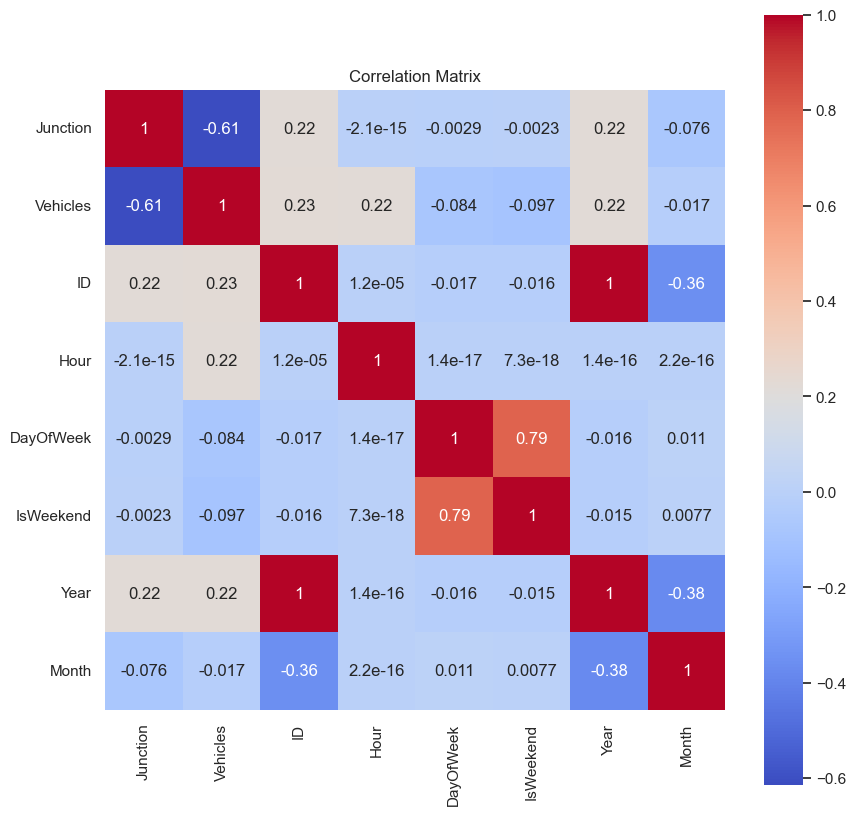

In [35]:
#Plotting the correlation matrix
corrmat = df.corr()

plt.subplots(figsize=(10, 10), facecolor="white") 
sns.heatmap(corrmat, cmap="coolwarm", annot=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [36]:
#Lastly, to wrap up this observation of our first data set, we will view a pairplot and explore relationships 
#between variables, identify patterns, and gain insights into potential correlations and distributions within your data.

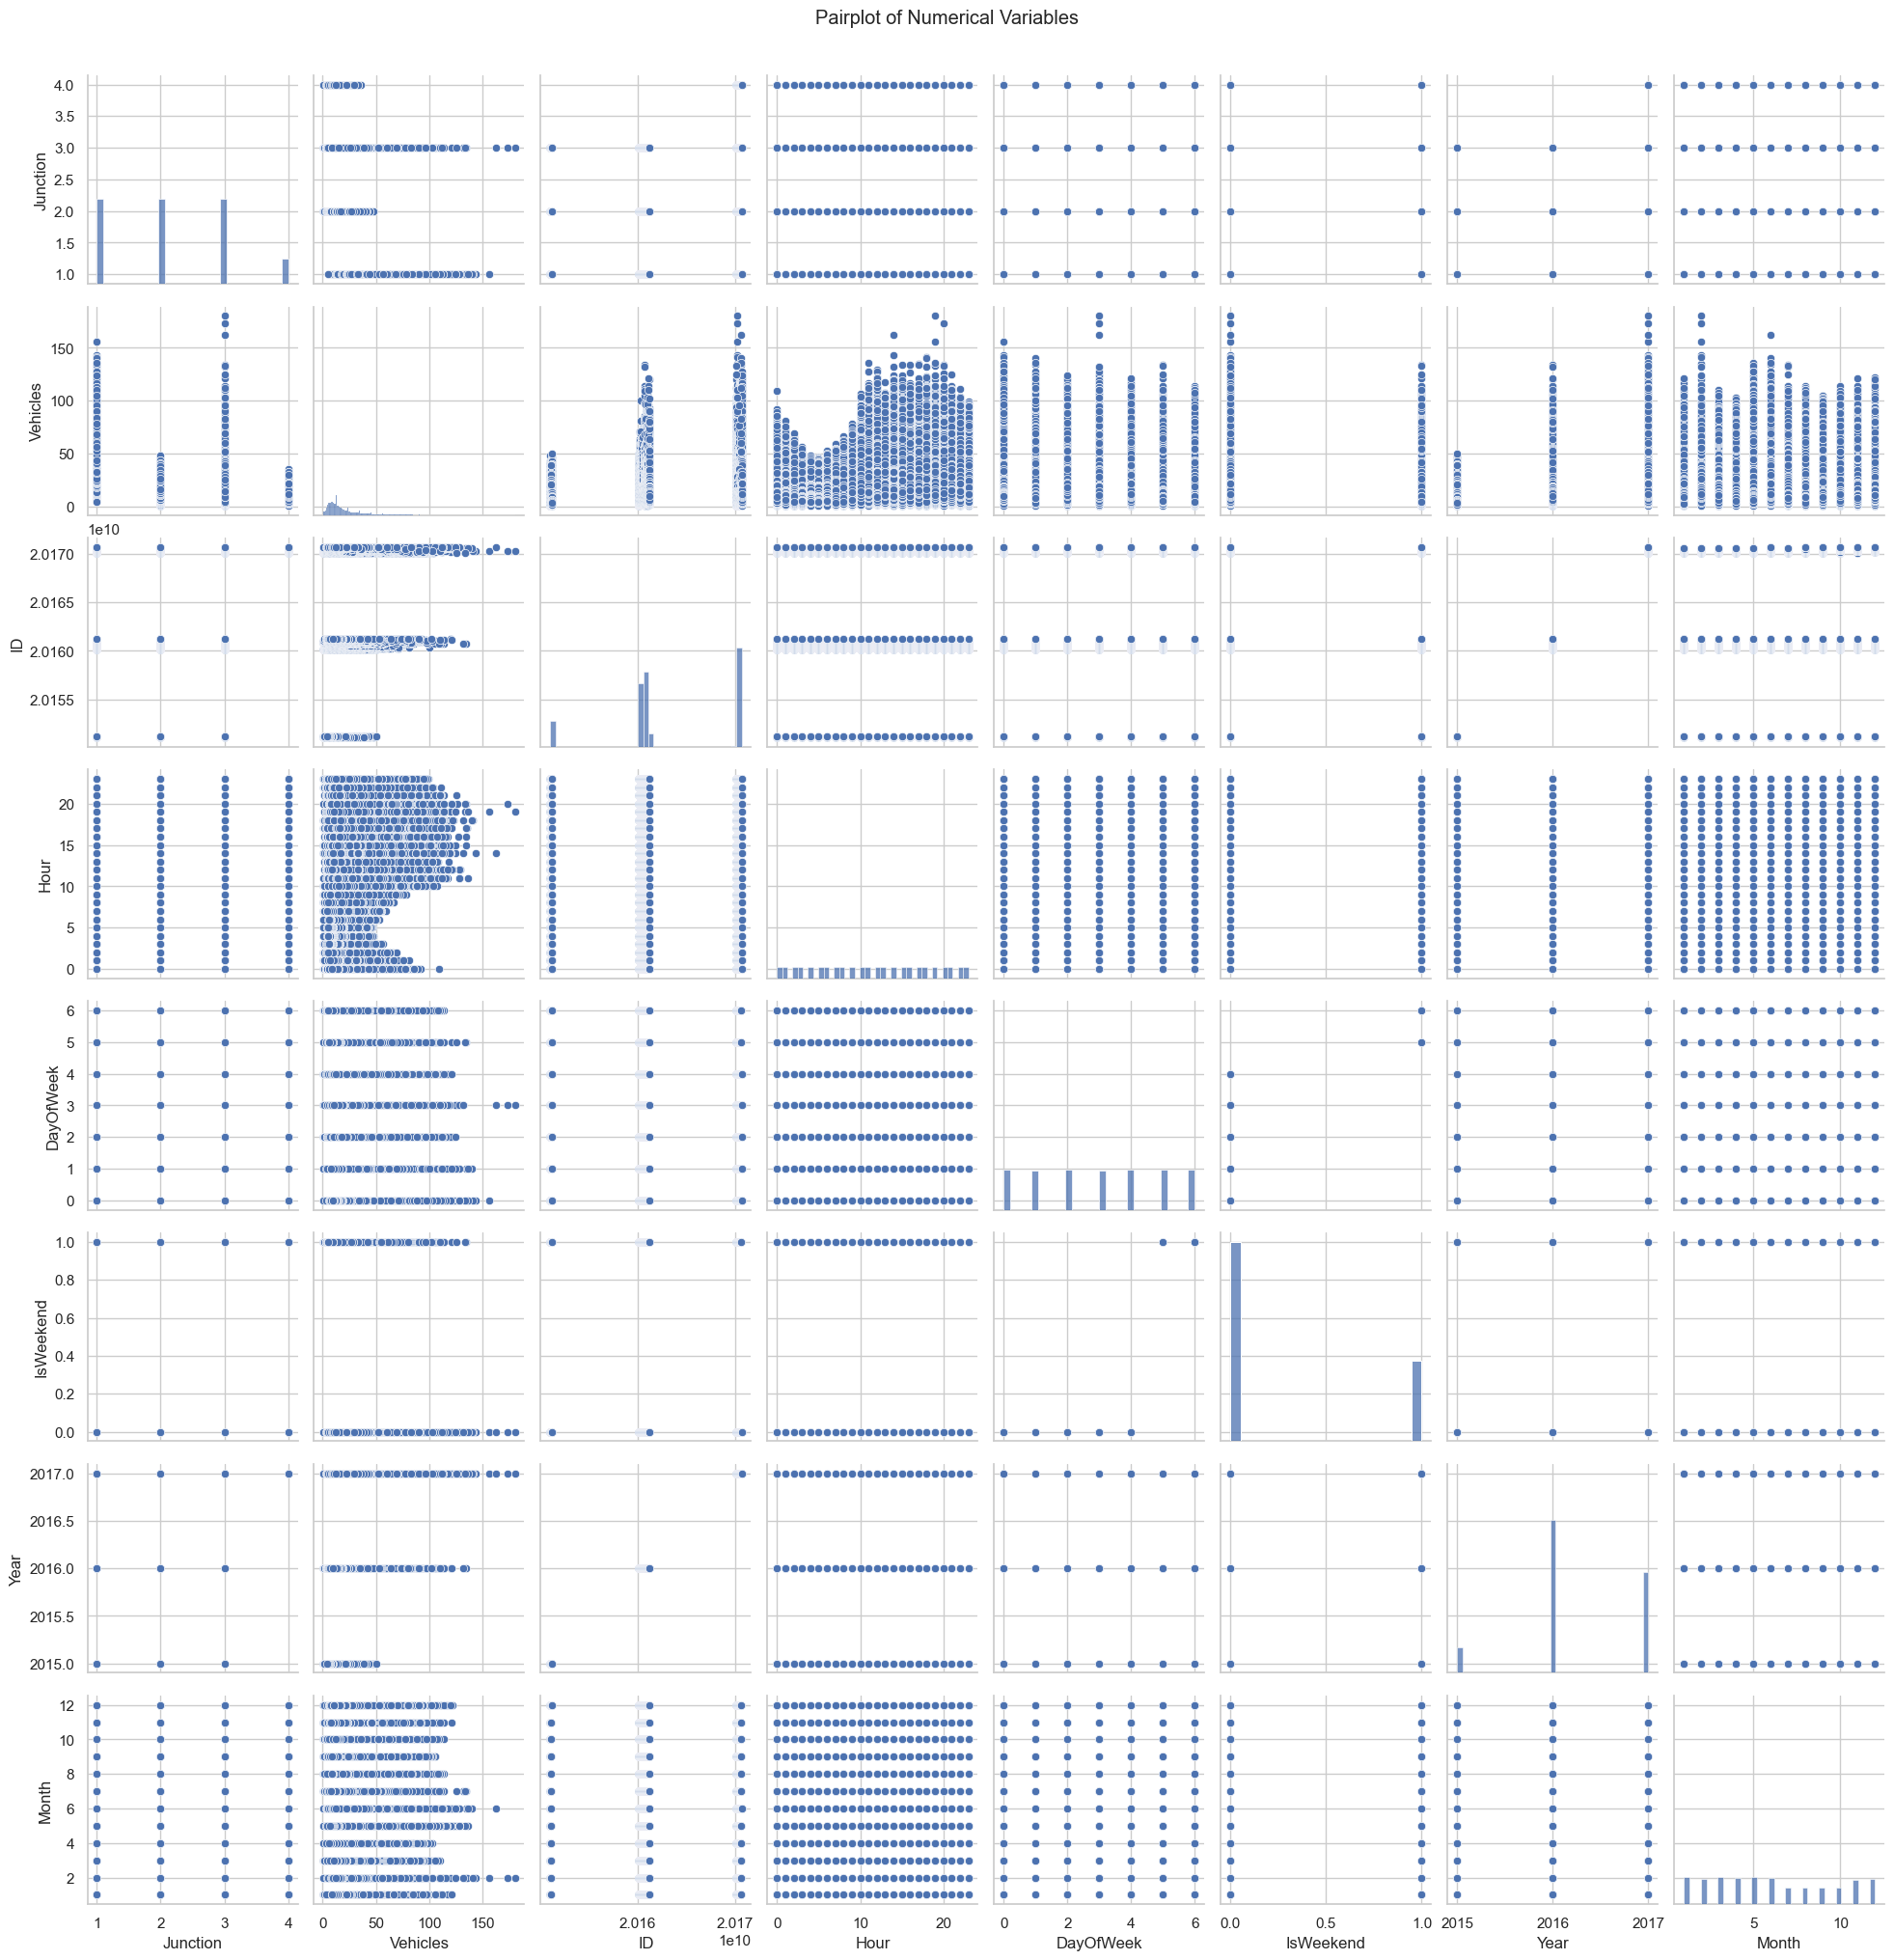

In [39]:
#Create a pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()